---  
  
# H. Introduction  
  
Author: Nicku R. Perdana  
  
This document is intended for model inference purposes and relies on the product of previous model development, which is a file named `cnn_model.keras`. We will use several images available in the document to test our model, including three images as unseen data: inference_image1.png, inference_image2.jpg, and inference_image3.jpg.

---

# H1. Import Libaries

In [1]:
# working with an image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# working with model imports
import tensorflow as tf
inf_model = tf.keras.models.load_model('cnn_model.h5')

# H2. Load Inference Images  
  
In this step, we are going to test the model with 3 random images found on the internet and predict the class each image belongs to.

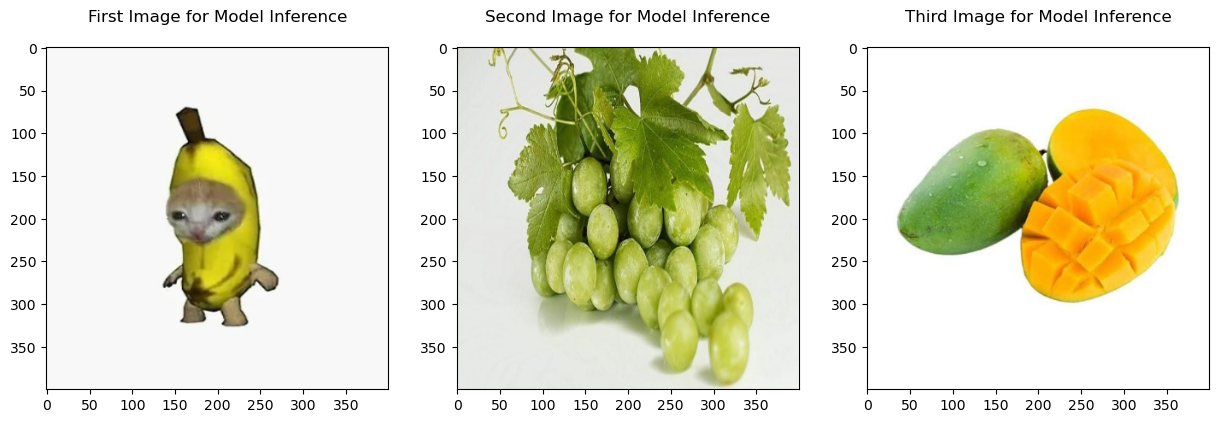

In [2]:
# prepare the first image
inf_img1 = cv2.imread('inference_image1.png')
inf_img1_col = cv2.cvtColor(inf_img1, cv2.COLOR_BGR2RGB)
inf_prep_img1 = cv2.resize(inf_img1_col, (400, 400))

# prepare the second image
inf_img2 = cv2.imread('inference_image2.jpg')
inf_img2_col = cv2.cvtColor(inf_img2, cv2.COLOR_BGR2RGB)
inf_prep_img2 = cv2.resize(inf_img2_col, (400, 400))

# prepare the third image
inf_img3 = cv2.imread('inference_image3.jpg')
inf_img3_col = cv2.cvtColor(inf_img3, cv2.COLOR_BGR2RGB)
inf_prep_img3 = cv2.resize(inf_img3_col, (400, 400))

nrows = 1
ncols = 3
list_inf_image = [inf_prep_img1, inf_prep_img2, inf_prep_img3]
list_inf_sequence = ['First', 'Second', 'Third']
fig = plt.figure(figsize=(15,5))

for position in range(1, ((nrows*ncols)+1)):
    if position > len(list_inf_image):
        break
    else:
        fig.add_subplot(nrows, ncols, position)
        plt.imshow(list_inf_image[position-1])
        plt.title(f'{list_inf_sequence[position-1]} Image for Model Inference\n')
plt.show()

At this step, we have prepared the data for model inference.

## H3. Predict Each Class

In [3]:
# FIRST IMAGE
# Normalize the color channel
inf_prep_img1_scal = inf_prep_img1 / 255.0
# reshape the prepared image
inf_prep_img1_reshape = np.reshape(inf_prep_img1_scal, [1,400,400,3])

# predict the image
# tf.keras.backend.clear_session()
class_1 = inf_model.predict(inf_prep_img1_reshape, verbose=0)
# return the class index
print(f'First Image is predicted to be an image of (class): {np.argmax(class_1)}')
# return the predict probability
print('Class : Probability')
display(dict(zip(['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'], list(class_1[0]))))


First Image is predicted to be an image of (class): 4
Class : Probability


{'Apple': 0.22088009,
 'Banana': 0.19244449,
 'Grape': 0.17928675,
 'Mango': 0.17814791,
 'Strawberry': 0.22924083}

In [4]:
list(class_1[0])

[0.22088009, 0.19244449, 0.17928675, 0.17814791, 0.22924083]

We predicted the first image as class index (2), which means the model is somewhat confident that the image is related to a Grape. It produced a probability of 0.2085 that this image is a Grape.

In [5]:
# SECOND IMAGE
# reshape the prepared image
inf_prep_img2_scal = inf_prep_img2 / 255.0
inf_prep_img2_reshape = np.reshape(inf_prep_img2_scal, [1,400,400,3])

# predict the image
# tf.keras.backend.clear_session()
class_2 = inf_model.predict(inf_prep_img2_reshape, verbose=0)
# return the class index
print(f'Second Image is predicted to be an image of (class): {np.argmax(class_2)}')
# return the predict probability
print('Class : Probability')
display(dict(zip(['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'], list(class_2[0]))))


Second Image is predicted to be an image of (class): 4
Class : Probability


{'Apple': 0.21836762,
 'Banana': 0.19419841,
 'Grape': 0.18293013,
 'Mango': 0.18110457,
 'Strawberry': 0.22339918}

The model predicted the second image as a Grape, which is correct according to the actual classification. It produced a probability of 0.2085 that this image is a Grape.

In [6]:
# THIRD IMAGE
# reshape the prepared image
inf_prep_img3_scal = inf_prep_img3 / 255.0
inf_prep_img3_reshape = np.reshape(inf_prep_img3_scal, [1,400,400,3])

# predict the image
# tf.keras.backend.clear_session()
class_3 = inf_model.predict(inf_prep_img3_reshape, verbose=0)
# return the class index
print(f'Third Image is predicted to be an image of (class): {np.argmax(class_3)}')
# return the predict probability
print('Class : Probability')
display(dict(zip(['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'], list(class_3[0]))))


Third Image is predicted to be an image of (class): 4
Class : Probability


{'Apple': 0.22039987,
 'Banana': 0.1928074,
 'Grape': 0.17999345,
 'Mango': 0.17871499,
 'Strawberry': 0.22808424}

The model predicted our third image as a Mango, which is also correct according to the image's real classification. It produced a probability of 0.2097 that this image is a Mango.

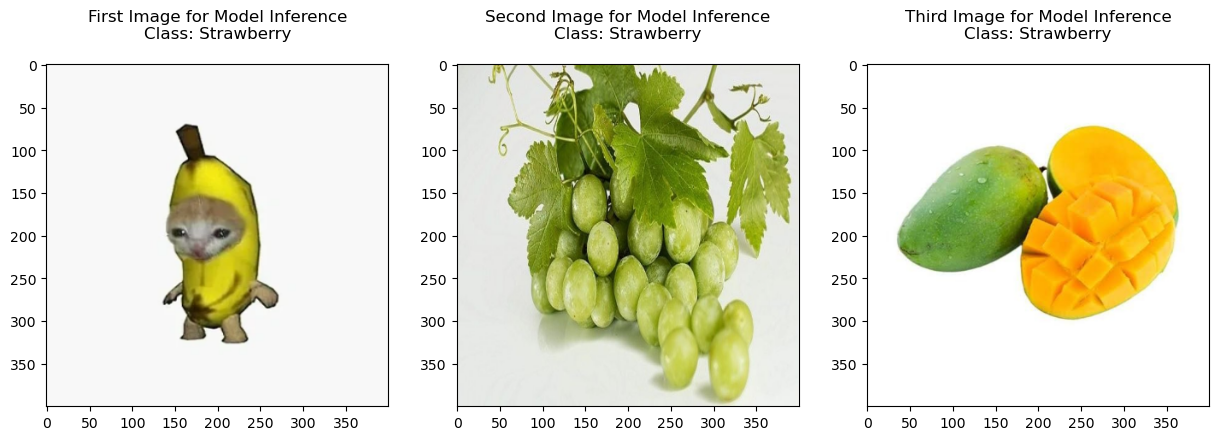

In [7]:
# summarize the prediction
nrows = 1
ncols = 3
list_inf_image = [inf_prep_img1, inf_prep_img2, inf_prep_img3]
list_inf_sequence = ['First', 'Second', 'Third']
list_class = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
list_classif = [class_1, class_2, class_3]
fig = plt.figure(figsize=(15,5))

for position in range(1, ((nrows*ncols)+1)):
    if position > len(list_inf_image):
        break
    else:
        fig.add_subplot(nrows, ncols, position)
        plt.imshow(list_inf_image[position-1])
        plt.title(f'{list_inf_sequence[position-1]} Image for Model Inference\nClass: {list_class[np.argmax(list_classif[position-1])]}\n')
plt.show()

In reality, our model missed all prediction for all the images provided for our model inference. It is worth noting that this is possible due to the model's nature of underfitted accuracy and high loss value.

# H4. Conclusion  
  
- Our model was unable to predict several images with distinct characteristics. In this scenario, we attempted to predict three types of images:
  - Images displaying a single object clearly within the frame (image three).
  - Images featuring multiple objects related to the main subject (image two).
  - Images that have undergone some editing without altering the fundamental characteristics of the main fruit object within the frame (image one).
- The findings suggest that the model mispredicted all the provided inference images. This could be attributed to several factors.